In [1]:
import numba
from numba import guvectorize, jit, float64, void
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import quantities as pq
import numpy as np
import time

from neuronunit.optimization.optimization_management import inject_and_plot_model,model_to_rheo
import numpy as np

from numba import guvectorize
from jithub.models import model_classes
import unittest
from collections import OrderedDict
model = model_classes.ADEXPModel()
model.attrs = OrderedDict(model.attrs)

In [2]:
model.attrs['dt'] = 0.25
model = model_to_rheo(model)
print(model.rheobase)
amp = model.rheobase
ALLEN_DELAY = 1000.0 * pq.ms
ALLEN_DURATION = 2000.0 * pq.ms
uc = {
"amplitude": amp,
"duration": ALLEN_DURATION,
"delay": ALLEN_DELAY,
}


1.351753345443285 pA


In [3]:
amplitude=1.351753345443285 * pq.pA
delay=ALLEN_DELAY
duration=ALLEN_DURATION
padding=0 * pq.ms
padding = float(padding)
amplitude = float(amplitude.magnitude)
duration = float(duration)
delay = float(delay)
stim = {"start": delay, "stop": duration + delay, "pA": amplitude, "padding":padding}
model.attrs.update(stim)
model.attrs = OrderedDict(model.attrs)


In [4]:
def make_gene_array(gene_models,shared_model):
    '''
    
    '''
    param_vec = np.array([ np.array([ v for v in list(m.attrs.values())], dtype=np.float32) for m in gene_models ])
    shared_model._backend.vector_attrs = param_vec
    #print(np.shape(param_vec))

    vm_results = shared_model.inject_square_current_vectorized(param_vec)
    spikes = shared_model.evaluate_spk_collection(results)

    return vm_results,param_vec,spikes

gene_models = [model for i in range(0,10)]
vm_results,param_vec,spikes = make_gene_array(gene_models,model)


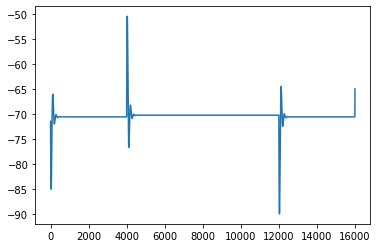

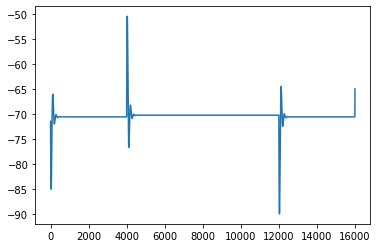

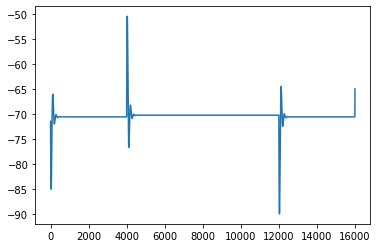

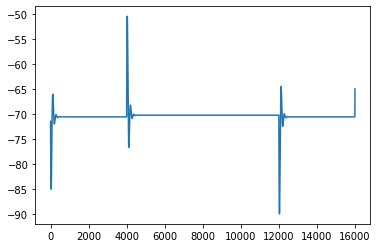

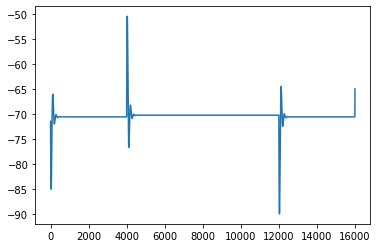

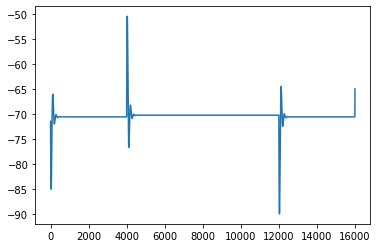

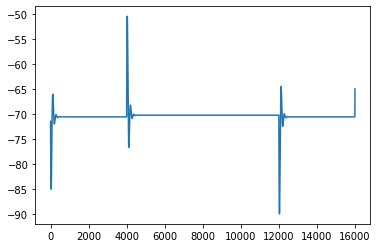

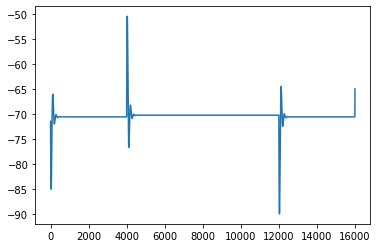

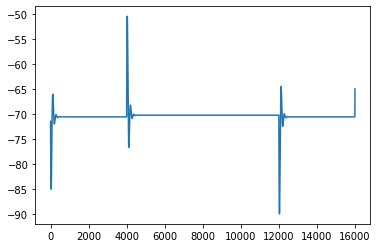

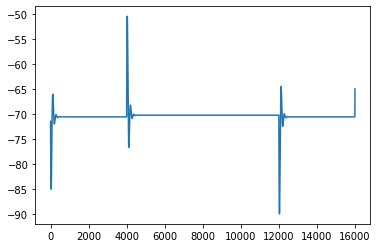

In [5]:
import matplotlib.pyplot as plt
for res in vm_results:
    plt.plot([i for i in range(0,len(res[:]))],[i for i in res[:]])
    plt.show()

# JIT 6.6 ms ± 426 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
results = model.inject_square_current_vectorized(param_vec)

spikes = model.evaluate_spk_collection(results)
#np.shape(results)
spikes[]

In [7]:
%matplotlib inline

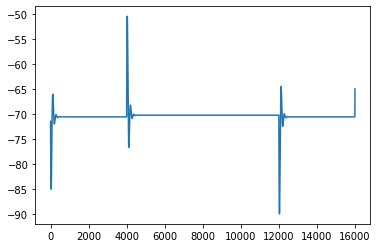

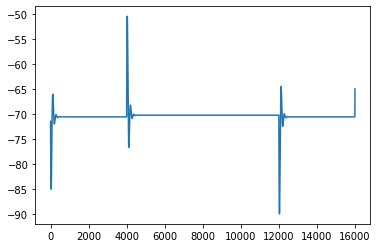

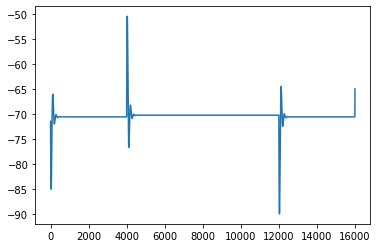

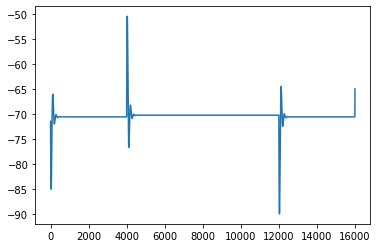

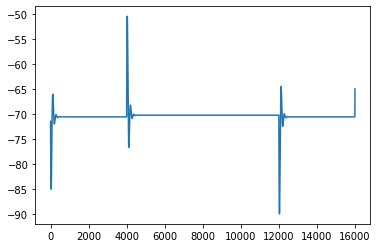

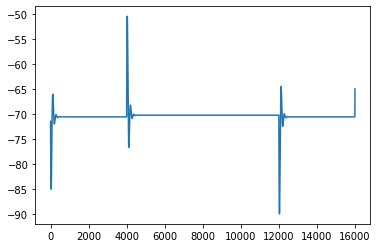

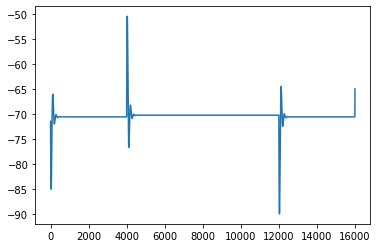

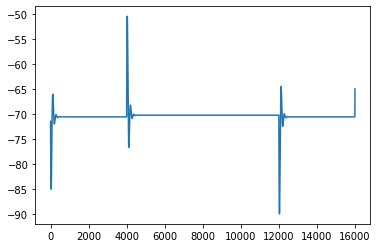

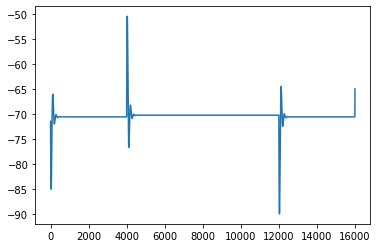

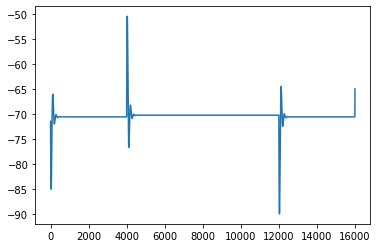

In [8]:
import matplotlib.pyplot as plt
for res in results:
    plt.plot([i for i in range(0,len(res[:]))],[i for i in res[:]])
    plt.show()

In [9]:
results

array([[-71.48967603, -72.3538483 , -73.19186169, ..., -70.59999786,
        -70.59999786, -65.        ],
       [-71.48967603, -72.3538483 , -73.19186169, ..., -70.59999786,
        -70.59999786, -65.        ],
       [-71.48967603, -72.3538483 , -73.19186169, ..., -70.59999786,
        -70.59999786, -65.        ],
       ...,
       [-71.48967603, -72.3538483 , -73.19186169, ..., -70.59999786,
        -70.59999786, -65.        ],
       [-71.48967603, -72.3538483 , -73.19186169, ..., -70.59999786,
        -70.59999786, -65.        ],
       [-71.48967603, -72.3538483 , -73.19186169, ..., -70.59999786,
        -70.59999786, -65.        ]])

In [10]:
param_vec

array([[ 2.8099999e-01, -4.0000000e+01, -7.0599998e+01, -7.0599998e+01,
         9.3667002e+00,  4.0000000e+00,  8.0499999e-02,  2.0000000e+00,
         1.4400000e+02, -5.0400002e+01,  3.0000000e+01,  2.5000000e-01,
         1.0000000e+03,  3.0000000e+03,  1.3517534e+00,  0.0000000e+00],
       [ 2.8099999e-01, -4.0000000e+01, -7.0599998e+01, -7.0599998e+01,
         9.3667002e+00,  4.0000000e+00,  8.0499999e-02,  2.0000000e+00,
         1.4400000e+02, -5.0400002e+01,  3.0000000e+01,  2.5000000e-01,
         1.0000000e+03,  3.0000000e+03,  1.3517534e+00,  0.0000000e+00],
       [ 2.8099999e-01, -4.0000000e+01, -7.0599998e+01, -7.0599998e+01,
         9.3667002e+00,  4.0000000e+00,  8.0499999e-02,  2.0000000e+00,
         1.4400000e+02, -5.0400002e+01,  3.0000000e+01,  2.5000000e-01,
         1.0000000e+03,  3.0000000e+03,  1.3517534e+00,  0.0000000e+00],
       [ 2.8099999e-01, -4.0000000e+01, -7.0599998e+01, -7.0599998e+01,
         9.3667002e+00,  4.0000000e+00,  8.0499999e-02,  2.00